

# <h3 align="center"> $\underline{\text{ Notebook Neuronale Netze}}$</h3>

<h3 align="center">$ \text{Statistical Machine Learning}$</h3>








In [ ]:
import os
from IPython.display import Image

# Outline


* 1. conception and construction of neuronal networks
    * 1.1. construction of a perceptron
    * 1.2. neuron with continuous output
    * 1.3. construction of a feedforward neural network
        * 1.3.1. NN in matrix notation
    * 1.4. cost functions
        * 1.4.1. problem definition
        * 1.4.2 Stochastic Gradient Descent

* 2. backpropagation
    * 2.1. calculation example: gradient descent method
    * 2.2. slow convergence
    * 2.3. derivation cross-entropy cost function

* 3. model optimization
    * 3.1 Regularization
    * 3.2. dropout method
    * 3.3. short notes concerning hyperparameter tuning * 4.

* 4. recurrent neural networks

* 5. application example 1: classification of digits
    * 5.1 Classification of digits with classical Feedforward Neural Networks
    * 5.2. extending the model with a Hidden Layer
    * 5.3. further addition of a hidden layer

* 6. application example 2: classification of color images using CNN
    * 6.1. application of model 3 to cifar10
    * 6.2. use of a Convolutional Neural Network

* 7. outlook Explainable AI

* 8. literature


# **1. Conception and Construction of Neural Networks** <a class="anchor" id="chapter1"></a>
In the following section, the basic mathematical concepts behind neural networks (NN) and their building blocks, neurons, will be explained. Furthermore, an evaluation metric regarding the prediction quality of an NN will be discussed and the problem of optimizing an NN will be introduced.

## 1.1 Structure of a perceptron
A perceptron processes a linear combination of the weighted (metric) inputs $X \in \mathbb{R}^k$ and its individual bias $b$. The perceptron thus aggregates and processes the information from the features. The freely adjustable parameters are the *weights* $w \in \mathbb{R}^k$ and the bias $b \in \mathbb{R}$, which can be thought of as the activation slope of the perceptron. The so-called weighted input $z$ can be represented as follows:


$z=\sum_{j=0}^{k}w_jx_j+b \in \mathbb{R}$

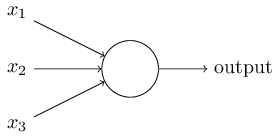

In [ ]:
!wget -q http://neuralnetworksanddeeplearning.com/images/tikz9.png
Image(filename='tikz9.png',width=600)

In its original form, the perceptron only passed on values of 0 or 1, depending on whether the weighted input $z$ was above a specified threshold.

\begin{align}
\text{Output} = \begin{cases}
    0     & \text{ falls } z < \text {Schwellenwert}, \\
    1  & \text{ falls } z \geq \text{Schwellenwert}
\end{cases}
\end{align}

## 1.2 Neuron with continuous output
In research, it has been shown that a network constructed in this way is hardly capable of learning, since it is difficult to predict what effect a change in the $w$ or $b$ will have. This also means that it is difficult to estimate which $w$ and $b$ need to be adjusted and how in order to produce better results. However, this is necessary if automated learning is to occur.

For the reason already mentioned, models were sought which provide a continuous output. This was achieved by introducing information processing units called neurons. These pass the weighted input $z$ to subsequent neurons after it has been transformed by a so-called activation function. As an example, an activation function is presented here, which is called a sigmoid function in this context:

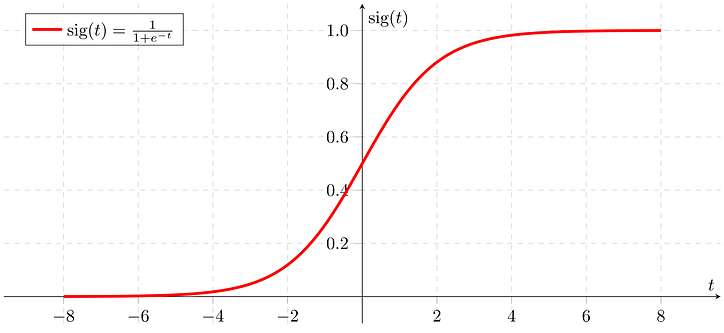

In [ ]:
!wget -q https://miro.medium.com/max/724/1*JHWL_71qml0kP_Imyx4zBg.png
Image(filename='1*JHWL_71qml0kP_Imyx4zBg.png',width=600)

$\space \space  \space  \space  \space  \space  \space  \space  \space  \space  \space  \space  \space  \space  \space  \space  \space  \space  \space  \space  \space  \space  \space \space  \space  \space  \space  \space  \space  \space  \space  \sigma(z)=\frac{1}{1+e^{-z}} \in [0,1] \quad \text{mit} \quad z=\sum_{j=0}^{J}w_jx_j+b$

Furthermore, this function allows to differentiate continuously, which is an important property in the context of optimization (cf. Section 2).


## 1.3 Construction of a Feedforward Neural Network
So far we have only had networks consisting of one "cell". In the following, networks consisting of several neurons will be considered. The first layer, also called layer, represents the input layer in such networks, i.e. the data to be processed are fed into these "neurons". However, no information processing takes place in them yet, which is why they do not represent neurons in the true sense of the word. This is typically followed by the so-called hidden layers, i.e. layers of neurons that process the information from the previous layer and pass it on to the next layer. The last layer is called the output layer, because the outputs of these neurons represent the result of the network.

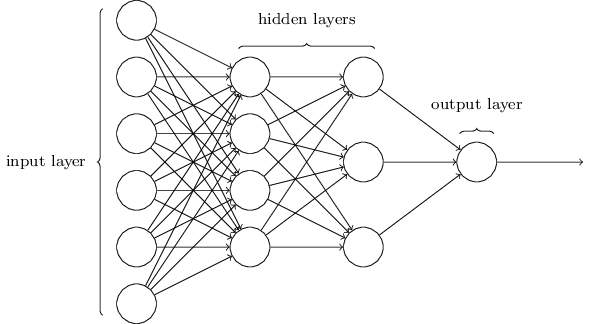

In [ ]:
!wget -q http://neuralnetworksanddeeplearning.com/images/tikz11.png
Image(filename='tikz11.png',width=600)

For the $j$-th neuron in layer $l$, the activation results: $a_j^l=\sigma\left[ \sum_{k} w_{jk}^la_k^{l-1}+b_j^l \right]$ This is typically passed to all neurons in the following layer.

### 1.3.1 NN in matrix notation


$a^{l-1} = (a^{l-1}_1 \dots a^{l-1}_k )^T$ is the vector of activations of layer $l-1$, i.e. the previous layers.
$\underbrace{w^l}_{j \times k}$ is the weight matrix belonging to the layer $l$: Individual values thus contain how much the output of a neuron from the previous layer flows as input into a neuron of the current layer.
$b^l = (b^l_1 \dots b^l_j)^T$ represents the bias vector, i.e. how much the $j$ neurons in the layer are inclined to pass on high output.


Thus, in summary, $\underbrace{z^l}_{j\times1}=\underbrace{w^l}_{j\times k} \underbrace{a^{l-1}}_{k \times 1}+\underbrace{b^l}_{j \times 1} \quad \text{with} \quad \underbrace{a^l}_{j \times 1} =\sigma(z^l)$

## 1.4 Cost functions
Before the goal of obtaining from the inputs a prediction as accurate as possible concerning the outputs, the functions of the inputs must be able to be evaluated. A measure for this is the prediction accuracy, which for metric predictions can be measured in terms of (Euclidean) distance measures. For example, the quadratic cost function corresponding to Mean Squared Error (MSE):

$$C= \frac{1}{2n} \sum_{x} (\sum_j a^L_j-y_j)^2 = \frac{1}{2n} \sum_x \lVert a^L-y \rVert^2$$

The cost is proportional to the squared distance of activation of all output neurons in layer $L$ from the actual values $y_j$ across all $x$ training data. Geometrically, this can be interpreted as the squared Euclidean distance, as expressed in the formula on the right.

Globally, the goal is now to choose the selectable parameters $w^l \in \mathbb{R}^{j \times k}$ as well as $b^l \in \mathbb{R}^{j}$ with $l=\{1,...,L\}$ such that the squared distance is minimized over all training data. Thus, analogous to other statistical learning methods (e.g., OLS regression), there is a minimization problem.

### 1.4.1 Problem definition
However, in the present case, the system of equations of the partial derivatives set equal to zero cannot be solved explicitly according to the variables. By default, a numerical optimizer is needed, e.g. the **gradient descent method**.

The idea here is to arrive at a solution step by step: Since the gradient vector $\nabla C$ can be set up and computed point by point, it is known in which "direction" one has to move on the hyperparaboloid of the (quadratic) cost function $C$ to reach a (hopefully global) minimum of $C$ (cf. figure below). The "axes of motion" here are the weights and biases' which are summarized below by the vector $v$. A change in this vector from $v_0$ to $v_1$ leads to a change in the cost function, which for small changes in $v$ is approximately equal to the point slope in $v_0$ multiplied by the change in $v$.

$\Delta C \approx \nabla C \times \Delta v \quad \text{with } \nabla C=(\frac{dC}{dv_1} \dots \frac{dC}{dv_k})^T$

Furthermore, the point change given by $\nabla C$ also gives the direction with the highest slope on the paraboloid of the cost function! That means if one moves on the axes $v$ in **opposite** direction to the gradient vector $\nabla C$ one has found the locally fastest way, resp. steepest descent towards the minimum of the cost function $C$. The step length in this opposite direction can be regulated by a global parameter $\mu$, the so-called learning rate.

$\Delta v = -\mu \times \nabla C \Rightarrow \Delta C = -\mu \lVert \nabla C\rVert^2 $

This has the further advantage that when the point slope given by $\nabla C$ decreases, the step length $\Delta v$ decreases simultaneously. As a result, near minima, step lengths automatically decrease, making it less likely to move beyond the minimum.





---



---

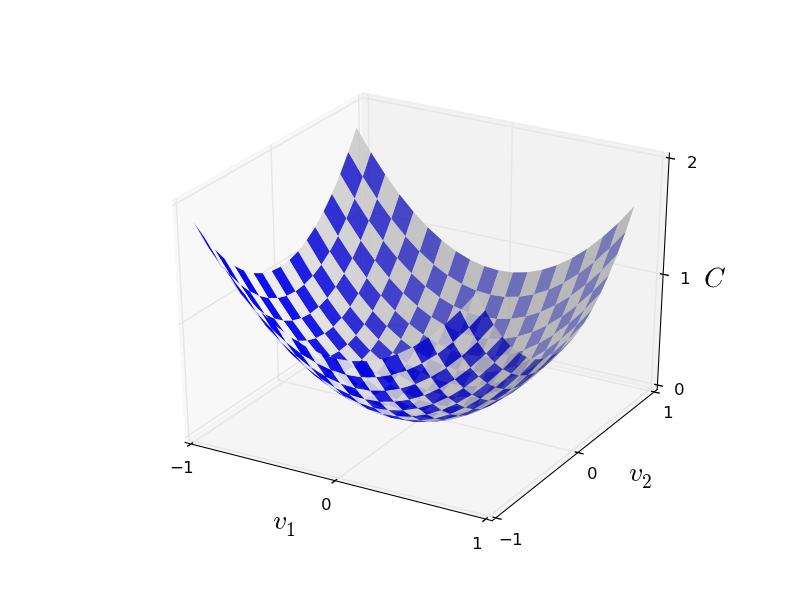

In [ ]:
!wget -q http://neuralnetworksanddeeplearning.com/images/valley.png
Image(filename='valley.png',width=600)

### 1.4.2 Stochastic Gradient Descent

Since now optimization would have to be done over all weights, bias' and all training data, this would result in a vector $v$ of length $n_{train}\times \underbrace{(j\times L)}_{\#b} \times \underbrace{(j\times k \times L)}_{\#w}$
provided that here simplified all layers have the same number of weights and biases'.

Consequences would be a huge computation time, which can be significantly reduced by using samples of size $m < n$ from the training data and still asymptotically yield results of global optimization accordingly. This procedure is called Stochastic Gradient Descent, and a sample from the training data is called a minibatch here.

$\frac{\sum_{j=1}^m \nabla C_{X_j}}{m} \approx \frac{\sum_{x} \nabla C_x}{n} = \nabla C \quad \Rightarrow \quad \text{Stochastic Gradient Descent}$

# **2. backpropagation**

Backpropagation describes the procedure of optimizing the freely selectable parameters (or variables) of a neural network with the goal of maximum prediction accuracy, which was already introduced in section 1. For this purpose it is necessary to minimize the cost function $C$, which is achieved (at least locally) as soon as the gradient $\nabla C$ corresponds to the zero vector. This optimization is done by adjusting the vector $v=[w,b]^T $ where $w$ and $b$ represent all weights and biases' in the NN. To illustrate how backpropagation works, we will use a simple example with only one input and one output:

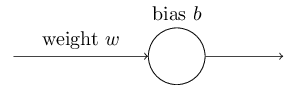

In [ ]:
!wget -q http://neuralnetworksanddeeplearning.com/images/tikz28.png
Image(filename='tikz28.png',width=600)

## 2.1 Calculation example: Gradient descent method
Being now the input $x = 1$, the desired true result $y = 0$ as well as the randomly initialized $w = 0.6$ and $b = 0.9$.

Then, for the derivation of the gradinet in $v_0$, we get:

$ z_0 = w_0 \times x + b_0 \rightarrow 0.6\times1+ 0.9 = 1.5 $

$a_0 = \sigma(z_0) = \frac{1}{1+e^{-z_0}} \rightarrow \frac{1}{1+e^{-1.5}} = 0.82 $

$C_0 =\frac{1}{2}(a_0-y)^2 \rightarrow \frac{1}{2}(0-0.82)^2=0.34 $

$\frac{\partial C_0}{\partial w_0} = \frac{\partial C_0}{\partial a_0} \frac{\partial a_0}{\partial z_0} \frac{\partial z_0}{\partial w_0} = a_0 \frac{e^{-z}}{(1+e^{-z})^2} x \rightarrow -0.82 \frac{0.223}{0.668} = 0.122$

$\frac{\partial C_0}{\partial b_0} = \frac{\partial C_0}{\partial a_0} \frac{\partial a_0}{\partial z_0}\frac{\partial z_0}{\partial b_0}= a_0 \frac{e^{-z}}{(1+e^{-z})^2}\rightarrow -0.82 \frac{0.223}{0.668} = 0.122$

$\nabla C_0 = [\frac{\partial C_0}{\partial w_0},\frac{\partial C_0}{\partial b_0}]^T = [0.122,0.122]^T $

With this data, the update is now performed:

$w_1 = w_0 - \mu \times \nabla C_{01} \quad \text{and} \quad b_1 = b_0- \mu \times \nabla C_{02} $

$w_1 = 0.6 - 0.15 \times 0.122= 0.58 $

$b_1 = 0.9 - 0.15 \times 0.122 = 0.88 $

$ z_1 = 0.58 \times 1 + 0.88 \rightarrow a_1 = \sigma (z_1) = 0.81 $

$C_1 = \frac{1}{2}(a_1-y)^2 = \frac{1}{2}(0.81-0)^2=\textbf{0.328}< \textbf{0.34}=C_0 $

The cost has decreased after the first iteration step, and the model has moved slightly closer to the (global) minimum. However, this minimal movement also represents an essential weakness of our current network, since extremely many iteration steps are necessary to reach the minimum (cf. upcoming figure).

## 2.2 Slow convergence

The reason for the current slow learning is the dependence of the gradient $\nabla C$ on the sigmoid function $\sigma$.

$\frac{\partial C_0}{\partial w_0} = \frac{\partial C_0}{\partial a_0} \frac{\partial a_0}{\partial z_0} \frac{\partial z_0}{\partial w_0} = \frac{\partial C_0}{\partial a_0} \times \sigma'(z) \times x \ $

$ \frac{\partial C_0}{\partial b_0} = \frac{\partial C_0}{\partial a_0} \frac{\partial a_0}{\partial z_0} = \frac{\partial C_0}{\partial a_0} \times \sigma'(z)$

If the output neuron $a$ initially returns values close to 0 or 1, the network learns slowly, regardless of how "far" one is from the known label $y$. It can be seen from the sigmoid function that the derivative of this function takes values close to 0 on large parts of its range of values, which means that at first a correspondingly long time must be trained with minimal effects until the neuron reaches the "S-range" of the function and learns faster.

The initial slow convergence is shown in the following graph, which continues the procedure from 2.1 for $R=300$ iteration steps.

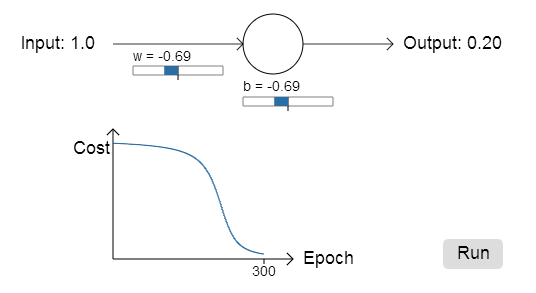

In [ ]:
!wget -q https://images1.programmersought.com/59/ad/adfde6a601013be5bd7dfcdb89fa53bb.png
Image(filename='adfde6a601013be5bd7dfcdb89fa53bb.png')

The goal should therefore be that learning occurs as a function of the severity of the error, similar to human learning: If the error is serious and obvious, the inference is immediate. However, if one is only partially wrong, the entire concept does not have to be discarded, but only corrected selectively. In the following, therefore, a new cost function will now be derived using the partial gradient after the bias $b$.

So far:
\begin{align}
\frac{dC_0}{db_0} =\frac{dC_0}{da_0} \times \sigma'(z) \tag{1}
\end{align}
target{target}
\begin{align}
\frac{dC_0}{db_0} = {a-y} \tag{2}
\end{align}

where:
\begin{align}
\sigma'(z)=\sigma(z)(1-\sigma(z))= a(1-a) \tag{3}
\end{align}

Substituting Eq.(3) into Eq.(1) we get:

\begin{align}
\frac{dC_0}{db_0} =\frac{dC_0}{da_0} \times {a(1-a)}\rightarrow \frac{dC_0}{da_0} = \frac{\frac{dC_0}{db_0}}{a(1-a)} \tag{4}
\end{align}

Substituting Eq.(2) into Eq. (4) gives:
\begin{align}
 \frac{dC_0}{da_0} = \frac{a-y}{a(1-a)} \tag{5}
\end{align}

Eq.(5) is the derivative of the cost function with respect to output $a$. Now integrating this derivative we obtain the new cost function with the desired properties from (2).


$$ C^{(CE)}=\int_a \frac{a-y}{a(1-a)}\,da=-\big[y \times ln(a) + (1-y) \times ln(1-a)\big]$$

This is the derivation of the so-called cross-entropy cost function (CE).
Properties of the cross-entropy cost function lead to faster convergence in most cases. In practice, other cost functions are used, or designed, depending on the objective and structure of the neural network.

The following graph illustrates the convergence of the computational example in section 2.1. when working with the CE cost function. The convergence is significantly faster than with the quadratic cost function (see figure).

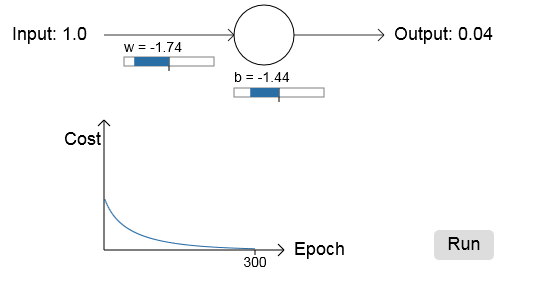

In [ ]:
!wget -q https://images2.programmersought.com/462/34/34fe0b5438cced66de1dc5c1d836f416.png
Image(filename='34fe0b5438cced66de1dc5c1d836f416.png',width=600)

#**3. Model Optimization**

The goal of model optimization is not only to achieve better performance and more robust models, but also to reduce the required training time, i.e. to achieve a faster convergence of the paramaters. To give an introduction to this topic, the tuning of some hyperparameters is exemplified in the following to convey how and by what the learning of a neural network can be influenced:

## 3.1 Regularization

Regularization is the insertion of a penalty term for existence of large $w$ into the cost function, so that in addition to cost reduction, the network learns to achieve this using the smallest $w$ possible. Previous cost function:

$$C^{CE} = -\frac{1}{n} \sum_x\Big[y \times \ln(a) + (1-y)\times \ln(1-a)\Big]$$
This is now expanded to:

$$C^{L2} = - \frac{1}{n} \sum_x\Big[y \times \ln(a) + (1-y)\times \ln(1-a)\Big] + \frac{\lambda}{2n}\sum_w w^2 $$

This regularization is called the L2 regularization. Alternatively, the $w$ can also enter absolutely, this is called the L1 regularization:
$$C^{L1} = - \frac{1}{n} \sum_x [y \times \ln(a) + (1-y) \times \ln(1-a)] + \frac{\lambda}{n}\sum_w |w | $$

Here, the hyperparameter $\lambda$ can be used to adjust how much the cost depends on the $w$. Regularization thus causes the network to try to avoid single very high $w$ and rather train a large number of low $w$. The effect of this is that the resulting decision of the neural network depends less on the activations of individual neurons. One could formulate that it is more difficult for the network to give too much weight to individual cues. Thus, the resulting classification is more likely to be based on the totality of available information.
It could be shown that regularized networks not only develop less overfitting with respect to the training data, but also typically perform slightly better than unregularized models. This could be due to the fact that the regularization term modifies the high-dimensional function set of the derivative of the cost function in such a way that former local minima are no longer minima if they can be reached via high individual $w$.

## 3.2 Dropout Method

The Dropout Method also aims at reducing the overfitting to the training data, to which models with many free parameters tend in principle. The Dropout Method does this by interfering with the learning process: Per learning cycle, only a different randomly selected part of the neurons in the hidden layers is trained. The unused neurons therefore have no influence on the output of the network within a cycle and are accordingly not considered in the backpropagation of the error.

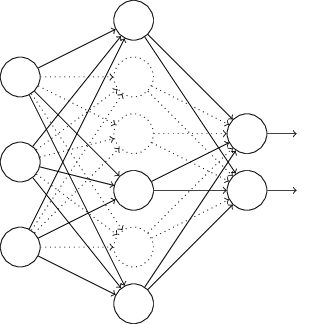

In [ ]:
!wget -q http://neuralnetworksanddeeplearning.com/images/tikz31.png
Image(filename='tikz31.png',width=500)

The result of this modified learning process is a network that has been trained to minimize the cost function when the existence of individual information processing elements for the decision is uncertain. Thus, the trained network will tend to apply essential processing steps multiple times and minimize highly complex information processing that relies on the existence of many preceding neurons. Accordingly, dropout methods are particularly useful for deep neural networks, where there is more potential to incorporate too much overfitting complexity into the model. Analogous to regularization, networks trained with this method tend to overfit significantly less to the training data.

## 3.2 Vergrößern des Datensatzes

Darüber hinaus gibt es bspw. die Möglichkeit, den Datensatz (auch ex post) zu vergrößern. Dies hat den Vorteil, dass zusätzliche Daten es dem Modell noch mehr erschweren, übermäßig an die Trainingsdaten angepasst zu werden. Außerdem kann durch geringfügige Modifikation der Bilder auch die Robustheit des Netzes gegenüber kleinen Veränderungen erhöht werden. Beispielsweise kann die Farbpalette eines Bildes leicht verändert werden oder Rauschen eingebaut werden. Je nach Input des neuralen Netzes ergeben sich hier verschiedene Möglichkeiten. Diese Methode sollte genutzt werden, wenn die Aufgabe des neuralen Netzes darin besteht, Objekten eine von sehr vielen möglichen Klassen zuzuweisen, da so das Problem von typischerweise sehr wenigen
Beobachtungen pro Klasse, was Überanpassung erleichtert, stark gemildert werden kann. Die folgende Grafik illustriert, dass selbst bei extrem vielen Trainingsbeispielen das Einfügen weiterer zu einem Performancegewinn führen kann:


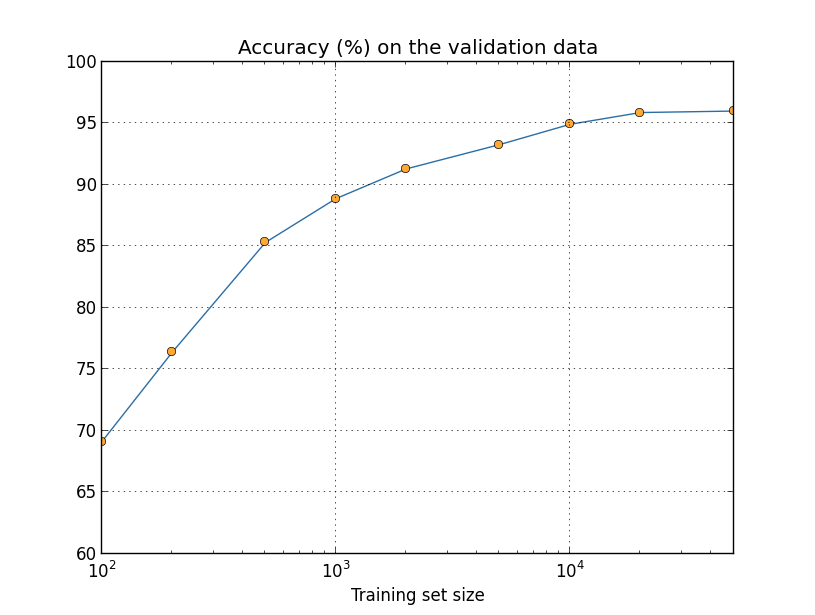

In [ ]:
!wget -q http://neuralnetworksanddeeplearning.com/images/more_data_log.png
Image(filename='more_data_log.png',width=600)

## 3.3 Short notes concerning hyperparameter tuning

In addition, some heuristics concerning the optimal configuration of the hyperparameters should be given at this point, the tuning itself is a possibly lengthy process, since the effects of the change of parameters often possess interactions and thus the individual parameters must be optimized iteratively. In addition, it is often not obvious which combination of parameters causes the model not to learn or to learn poorly. The following heuristics may prove useful:
1. start with the smallest possible NN with realistic chances of completing the task
2. if initial learning does not occur: Try to achieve learning on subtasks
3. if accuracy already oscillates with the initial learning rate $\mu$: reduce $\mu$
4. start with small minibatches for the Stochastic Gradient Descent
5. finetune $\lambda$ and $\mu$ alternately, $\mu$ can be set increasingly lower after a few epochs.

Alternatively, automatic hyperparameter optimization via grid search, e.g. using a so-called optimizer, can be used.

# **4 Recurrent Neural Networks**.

Up to now, only Feedforward Neural Networks have been presented in this notebook, i.e. networks in which the information processing takes place unidirectionally from the input layer to the output layer. Before in the second chapter of the application examples also an introduction into so-called Convolutional Neural Networks takes place, a short introduction into the so-called Recurrent Neural Networks is to take place at this point. This is done with the goal to clarify that neural networks are basically very free and individualizable models, which not only have a large number of free parameters, but also allow certain freedoms with respect to their structure. Recurrent neural networks are characterized by the fact that the information within the hidden layers can also be passed on to previous layers. In the simplest case, this is done by storing the information about the activation of a neuron and passing it on to an earlier neuron during the next input. This can also be extended by having all neurons pass on their activation for a period of time before resuming 0 as output. As a result, the neural network has a structure that has significantly more similarities to biological neurons. Schematically, the structure of a Recurrent Neural Network can be represented as follows:

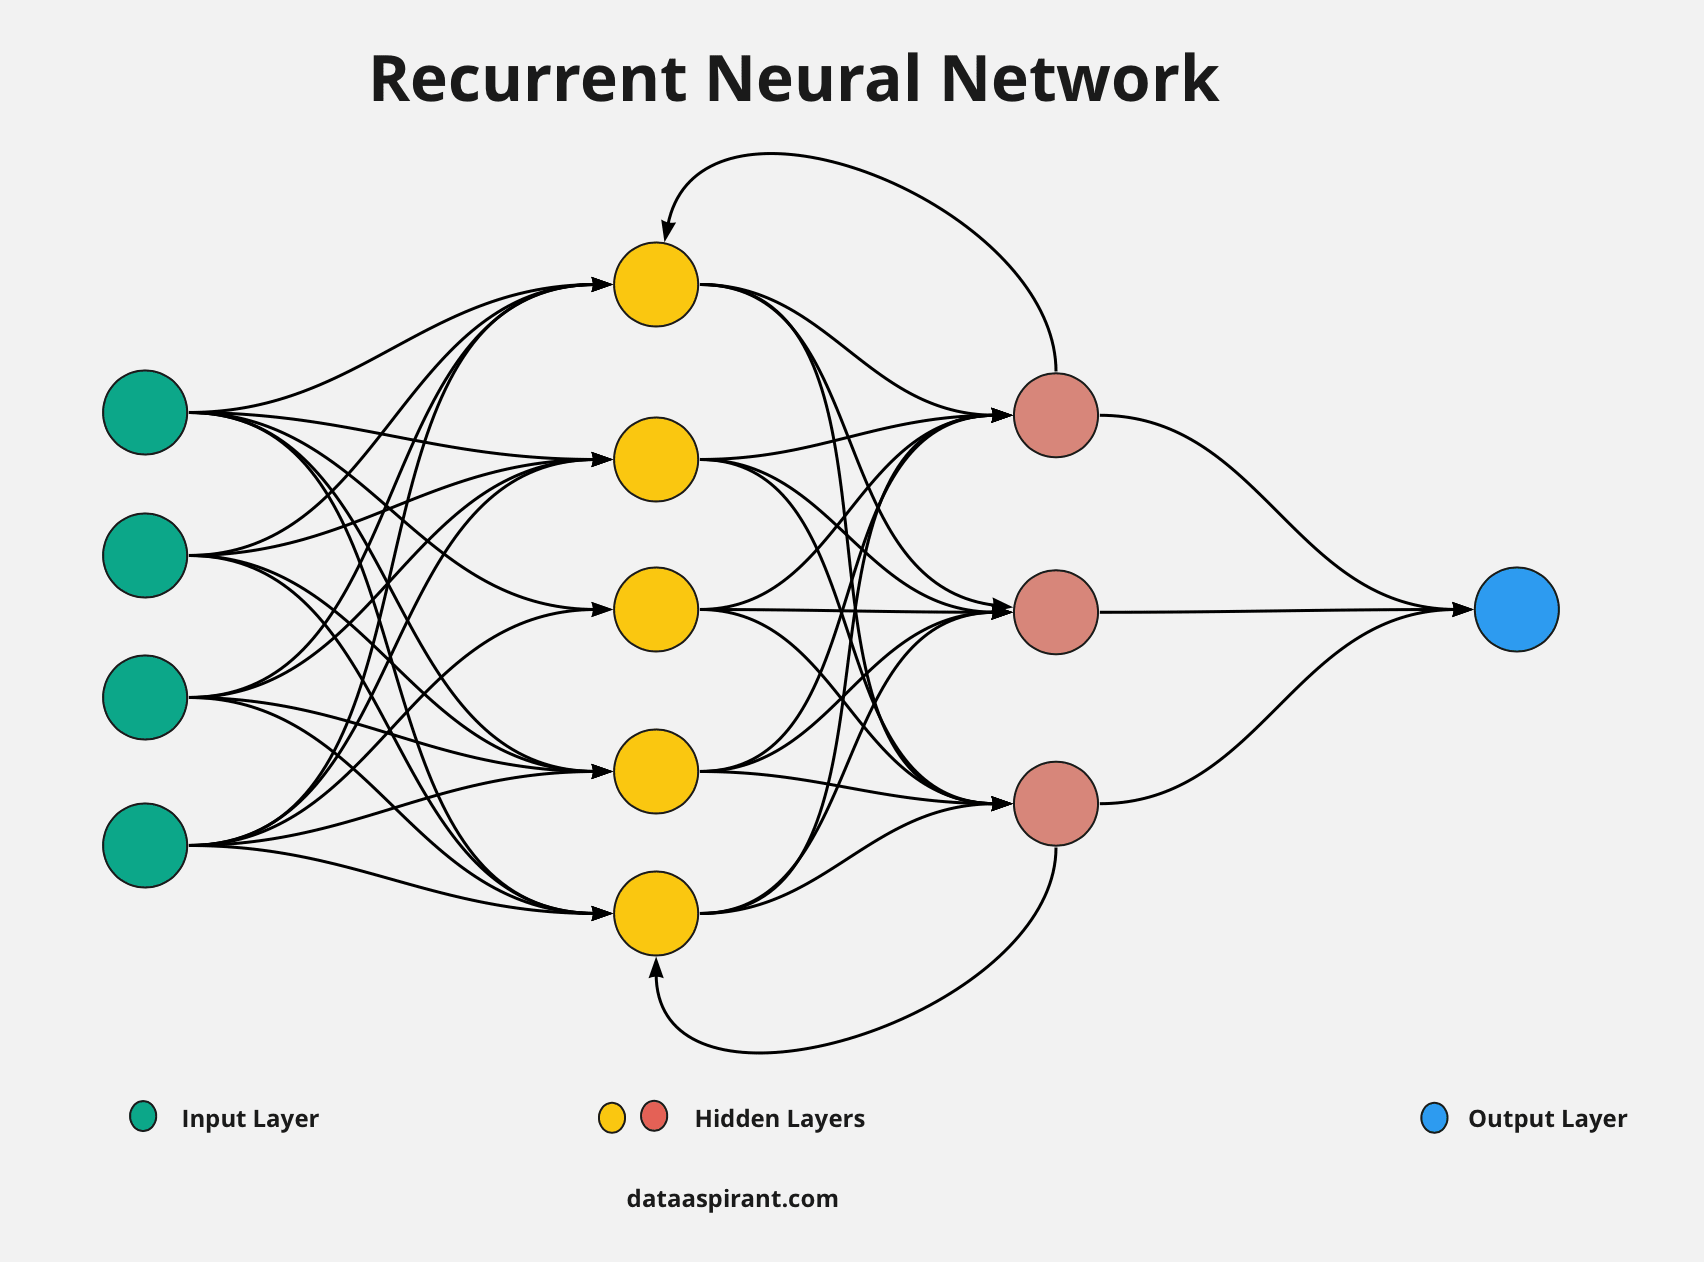

In [ ]:
!wget -q https://i0.wp.com/dataaspirant.com/wp-content/uploads/2020/11/3-Recurrent-Neural-Network.png
Image(filename='3-Recurrent-Neural-Network.png',width=600)

It follows from the properties of an RNN that it is particularly suitable for processing information that is in a temporal context, for example. Therefore, they are used in particular for processing time-related data or Natural Language Processing (NLP).

#**5. Application example 1: classification of digits**






## 5.1 Classification of digits with classical feedforward neural networks

---

Import the main libraries for the project:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import tensorflow as tf
from tensorflow import keras
#keras gives an application programming interface (API)
import seaborn as sn

Loading the dataset:

The training dataset is a subset of the dataset used to train a model

    x_train contains training images
    y_train contains the corresponding numbers on the images
In addition, a test dataset is stored analogously for validation:

    x_test contains images for evaluation
    y_test contains the corresponding numbers on the images

In [5]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


The mnist dataset contains 70,000 images of handwritten digits, of which 60,000 are used for training and 10,000 for testing the model:

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
len(x_test)

10000

The images are represented by 28 $\times$ 28 pixels in grayscale and contain all digits between 0 and 9. The pixel values range from 0 to 255: the majority of the background is close to 0, values close to 255 represent the font. This is illustrated by training image number 100, which represents the number 5:

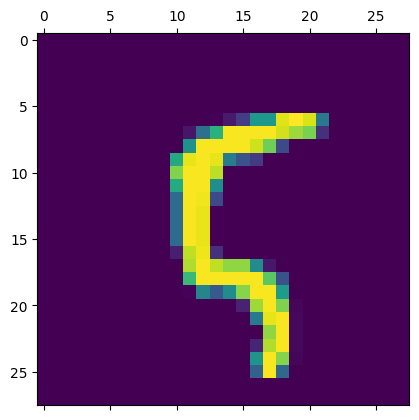

In [ ]:
plt.matshow(x_train[100])

Internally, the training image is represented as a two-dimensional array:

In [ ]:
np.set_printoptions(formatter={'all': lambda x: "{:.0f}".format(x)})
w=x_train[100]
for i in range(28):
   if i == 7:
        continue
   print(w[i, :])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 2 18 46 136 136 244 255 241 103 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 131 253 253 253 253 237 200 57 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 155 246 253 247 108 65 45 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 207 253 253 230 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 157 253 253 125 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 89 253 250 57 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 89 253 247 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 89 253 247 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 89 253 247 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 21 231 249 34 0 0 0 0 0 0 0 0 0

Before the array is used for learning, it is scaled, i.e. its contents are mapped to the number space $[0,1]$.

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

The first model, which consists only of the Input Layer and the Output Layer, can be visualized as follows:

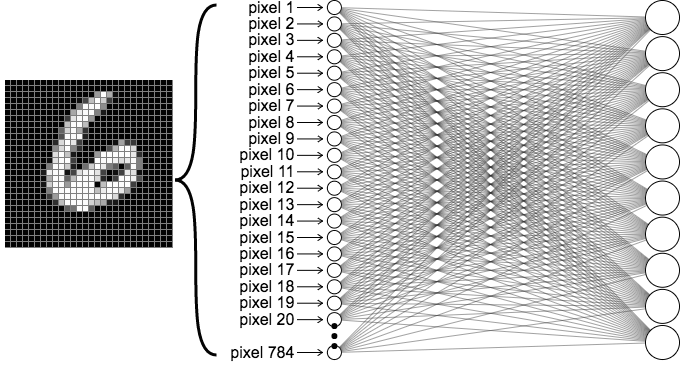

In [ ]:
!wget -q https://ml4a.github.io/images/figures/mnist_1layer.png
Image(filename='mnist_1layer.png')

In the following, essential commands for training a network with two layers are described:

1. sequential creates the layers in so called linear stacks.

2. flatten: converts the 28 $\times$ 28 image into a one-dimensional vector that can be used as input. As a result, the input layer has 784 neurons and the output layer has 10 neurons.

3. sense connects the neurons of the first layer (784) with the neurons of the second layer (10).

4. sigmoid sets the activation function of the neurons.

5. define an optimizer for the automatic optimization of the hyperparameters: "adam".

6. loss='sparse_categorical_crossentropy' defines a cost function optimized for categorical data

7. metrics = accuracy specifies performance metrics, here the proportion of true predictions in all predictions

8. fit trains the model with 20 training epochs

In [22]:
model1 = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(10, activation='sigmoid')])

model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

m1 = model1.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 9.5523 - accuracy: 0.8424
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 6.1602 - accuracy: 0.8785
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 5.7870 - accuracy: 0.8834
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 5.5822 - accuracy: 0.8852
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5454 - accuracy: 0.8862
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3001 - accuracy: 0.8884
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3526 - accuracy: 0.8881
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 5.1926 - accuracy: 0.8902
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2113 - accuracy: 0.8910
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 5.275

The following diagram shows how the accuracy of the model improves over the training epochs:

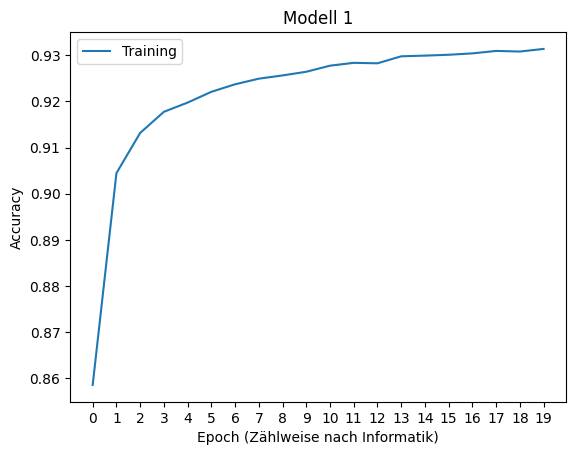

In [ ]:
plt.plot(m1.history['accuracy'])
plt.title('Modell 1')
plt.ylabel('Accuracy')
plt.xlabel('Epoch (Zählweise nach Informatik)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.legend(['Training'], loc='upper left')
plt.show()

The evaluation based on the test data set results in an almost identical performance:

In [ ]:
model1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2720 - accuracy: 0.9254


[0.2720392644405365, 0.9254000186920166]

In [ ]:
test_predicted=model1.predict(x_test)
np.argmax(test_predicted[100])

313/313 [==============================] - 1s 1ms/step


6

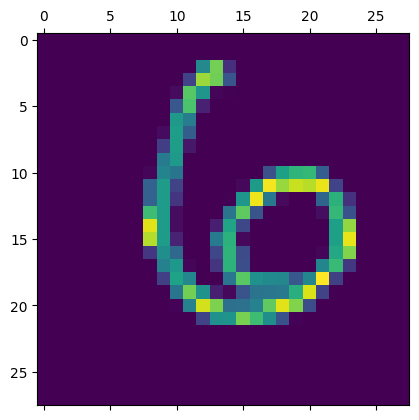

In [ ]:
plt.matshow(x_test[100])

The results can be plotted in a Confusion Matrix. The correspondences of classified value and label are plotted on the main diagonal:

Text(95.72222222222221, 0.5, 'Truth')

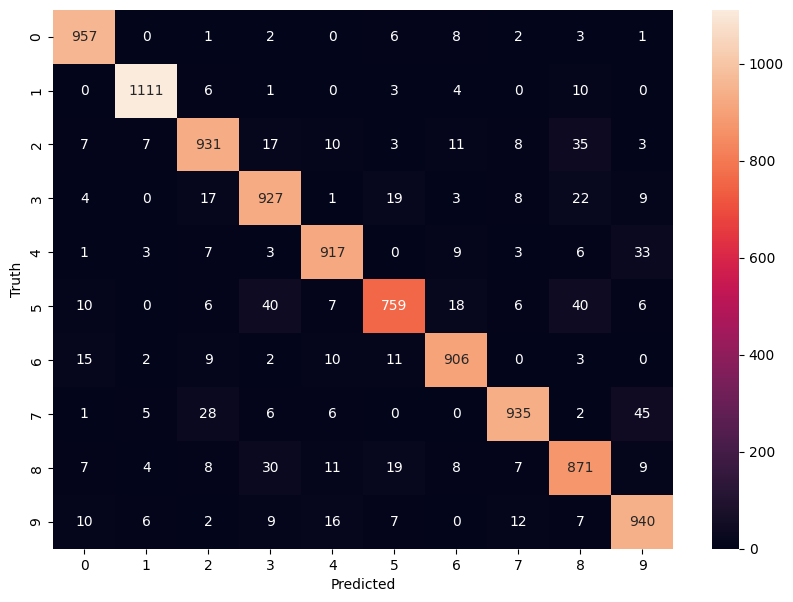

In [ ]:
predicted_labels = [np.argmax(i) for i in test_predicted]
cmt = tf.math.confusion_matrix(labels=y_test, predictions=predicted_labels)
plt.figure(figsize=(10,7))
sn.heatmap(cmt, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## 5.2 Extending the model with a hidden layer

In the constructing model 2, a hidden layer with 15 neurons and the activation function "ReLU", i.e. Rectified Linear Unit, is inserted:

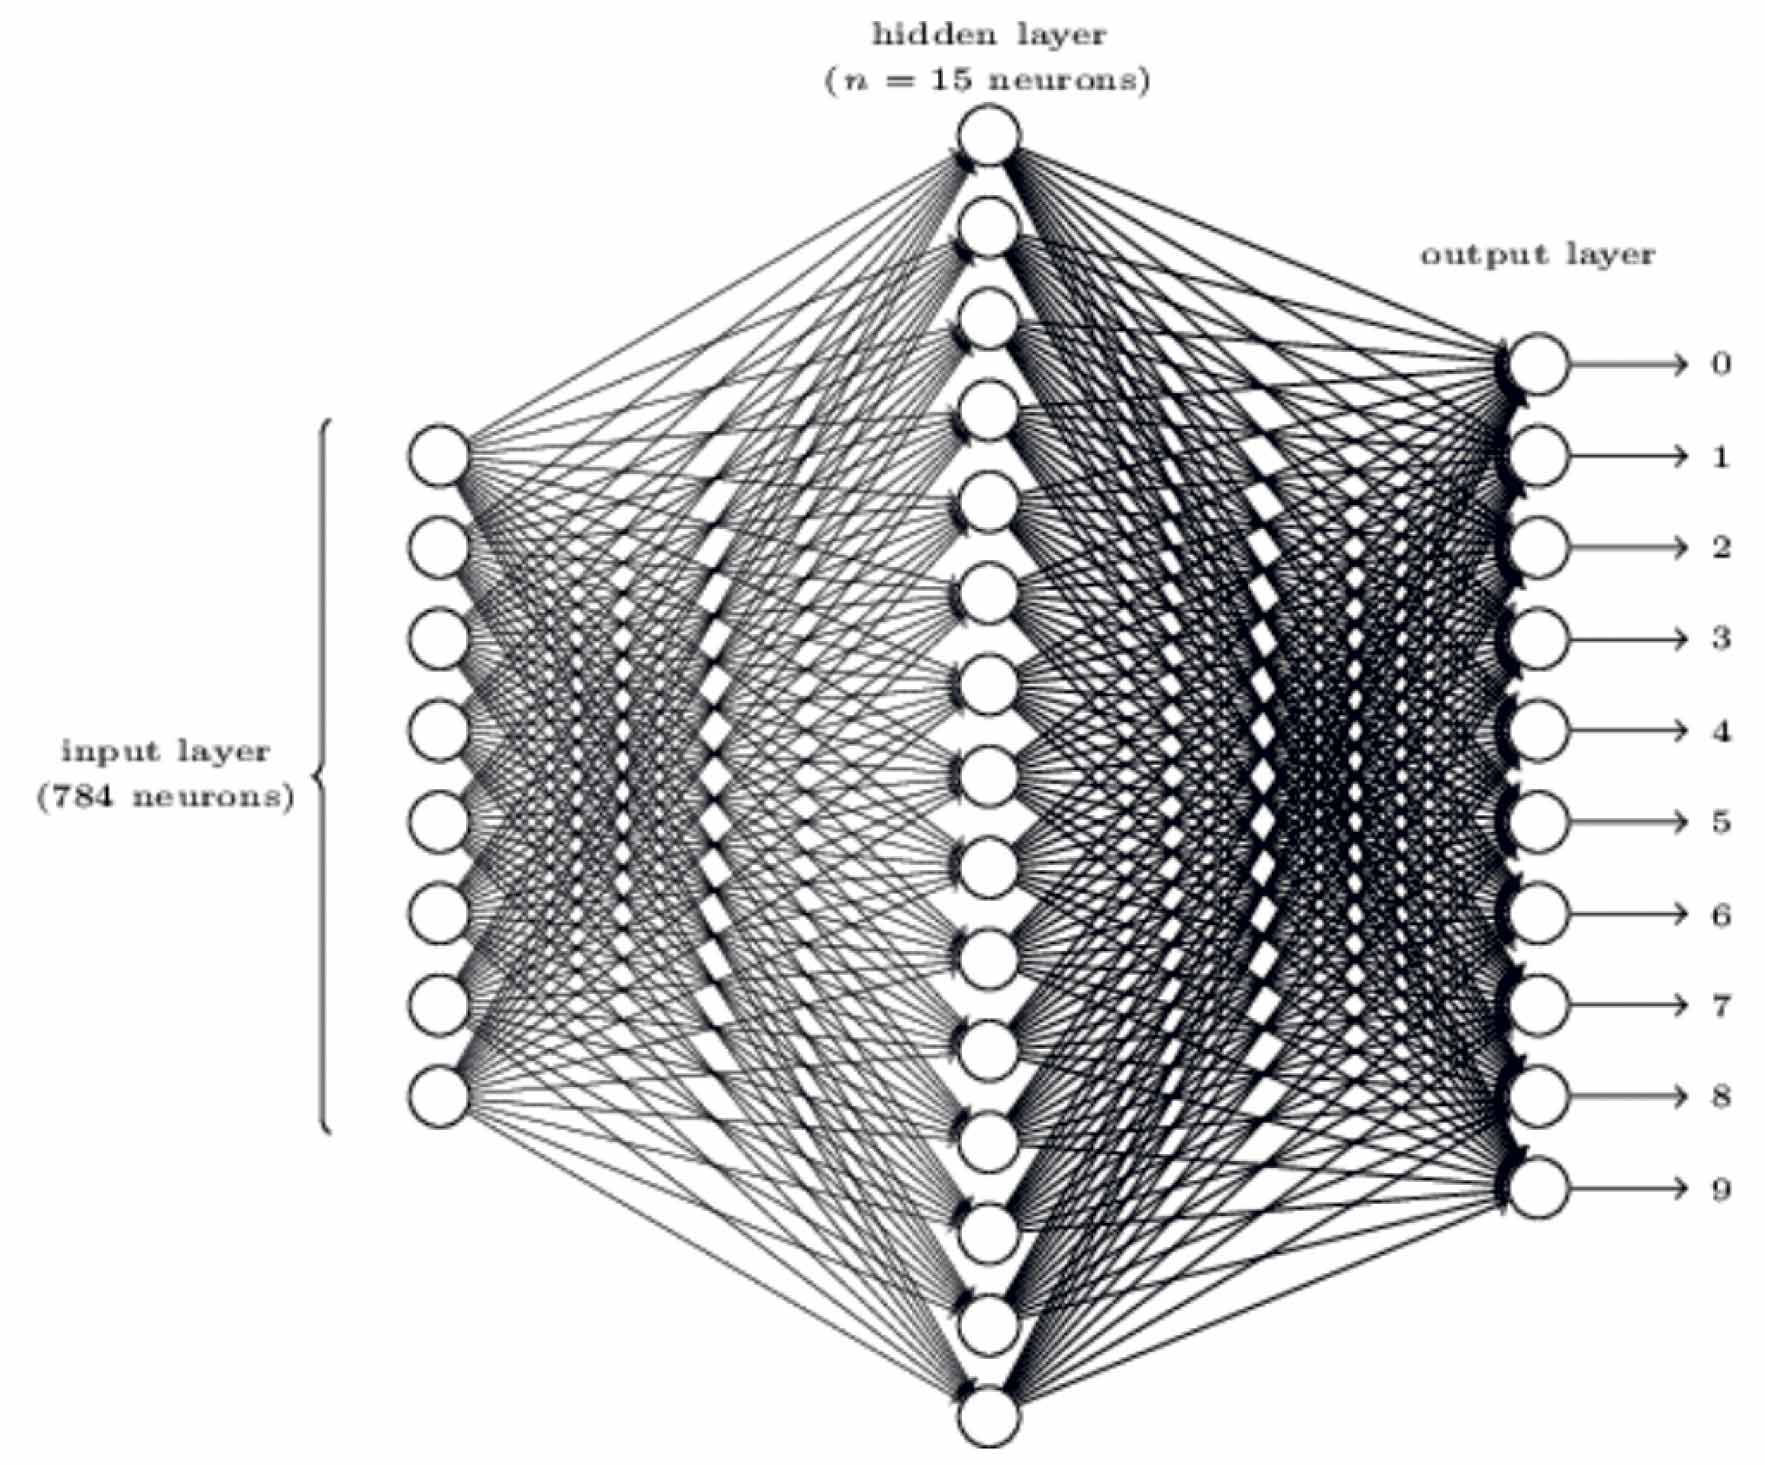

In [ ]:
!wget -q https://handbuch-ki.net/wp-content/uploads/2019/11/3_1_maschinelles_lernen_grafik_neuronales_netz_komplex_web.jpg
Image(filename='3_1_maschinelles_lernen_grafik_neuronales_netz_komplex_web.jpg',width=600)

In [6]:
model2 = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(15, activation='relu'),
                           keras.layers.Dense(10, activation='sigmoid')])

model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

m2 = model2.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 10s 3ms/step - loss: 2.6936 - accuracy: 0.1797
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9937 - accuracy: 0.2290
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8013 - accuracy: 0.3065
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6160 - accuracy: 0.3666
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5397 - accuracy: 0.3857
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4481 - accuracy: 0.4557
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3078 - accuracy: 0.5360
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2031 - accuracy: 0.5738
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1692 - accuracy: 0.5863
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.15

Analog zu Modell 1 ergibt sich folgendes Diagramm der Accuracy:


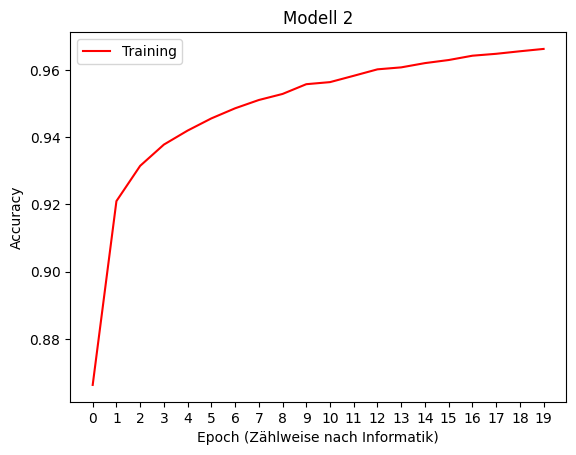

In [ ]:
plt.plot(m2.history['accuracy'],'r')
plt.title('Modell 2')
plt.ylabel('Accuracy')
plt.xlabel('Epoch (Zählweise nach Informatik)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.legend(['Training'], loc='upper left')
plt.show()

The evaluation of the test dataset yields an accuracy that is again just below the performance on the training dataset, but still above the best performance of Model 1 on the training dataset. The additional layer of neurons has been able to further improve the already very good performance of model 1:

In [ ]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1692 - accuracy: 0.9500


[0.1692149043083191, 0.949999988079071]

The Confusion Matrix associated with Model 2 is as follows:

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

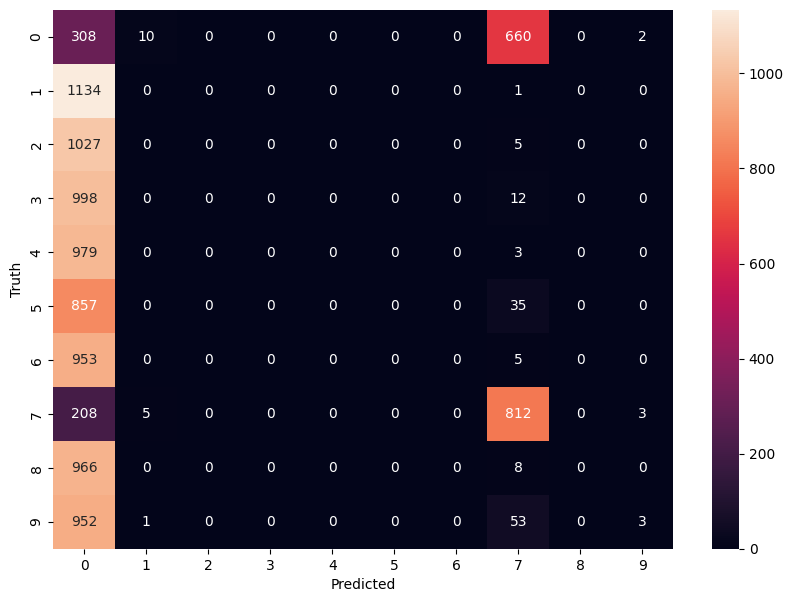

In [7]:
t_predicted = model2.predict(x_test)
predicted_labels = [np.argmax(i) for i in t_predicted]
cmt = tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cmt, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## 5.3 Further addition of a hidden layer


Adding another layer enlarges the neural network beyond the limit at which models are commonly referred to as "deep learning models". Specifically, another layer of neurons is added between the ReLU layer from Model 2 and the output layer. This layer contains 20 neurons and also uses ReLU as activation function. The choice of ReLU layers as hidden layers follows common practice (even if other activation functions are used depending on the problem).

In [8]:
model3 = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(15, activation='relu'),
                           keras.layers.Dense(20, activation='relu'),
                           keras.layers.Dense(10, activation='sigmoid')])

model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

m3 = model3.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 2.1908 - accuracy: 0.3905
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1669 - accuracy: 0.5739
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8413 - accuracy: 0.7344
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6131 - accuracy: 0.8324
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4712 - accuracy: 0.8702
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4095 - accuracy: 0.8876
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3749 - accuracy: 0.8944
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3563 - accuracy: 0.9000
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3442 - accuracy: 0.9028
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.334

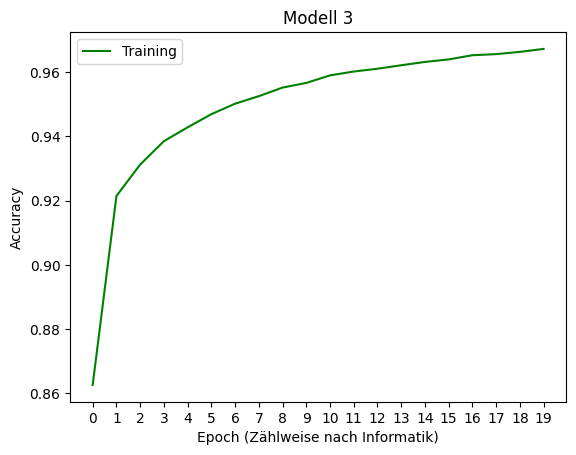

In [ ]:
plt.plot(m3.history['accuracy'], 'g')
plt.title('Modell 3')
plt.ylabel('Accuracy')
plt.xlabel('Epoch (Zählweise nach Informatik)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.legend(['Training'], loc='upper left')
plt.show()

The information processing process can be represented schematically as follows:

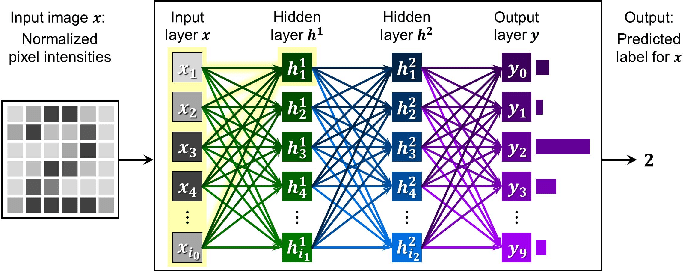

In [18]:
!wget -q https://www.researchgate.net/profile/Qixiang-Cheng/publication/339170912/figure/fig1/AS:857724015370240@1581508749401/MLP-for-handwritten-digit-classification-The-network-consists-of-four-layers-the-input.png
Image(filename='/content/MLP-for-handwritten-digit-classification-The-network-consists-of-four-layers-the-input.png')

The evaluation of the test data set shows only a slight improvement over model 2:

In [19]:
model3.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3298 - accuracy: 0.9190


[0.32981881499290466, 0.9190000295639038]

The Confusion Matrix of Model 3 has slightly more observations in the main diagonal:

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

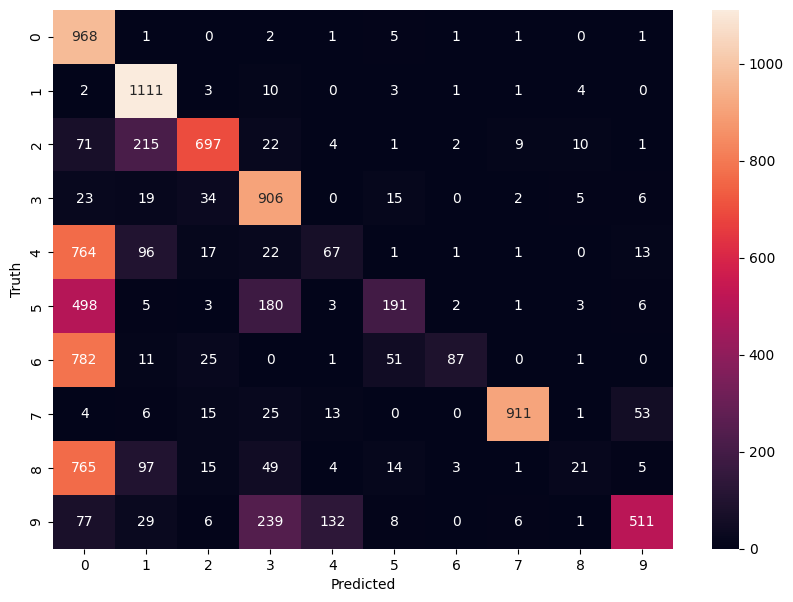

In [20]:
t_predicted = model3.predict(x_test)
predicted_labels = [np.argmax(i) for i in t_predicted]
cmt = tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cmt, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In the following diagram, the course of the performance of all three models is plotted. It is clearly visible that each added hidden layer could improve the performance of the network, but the performance gain decreases strongly for each additional layer:


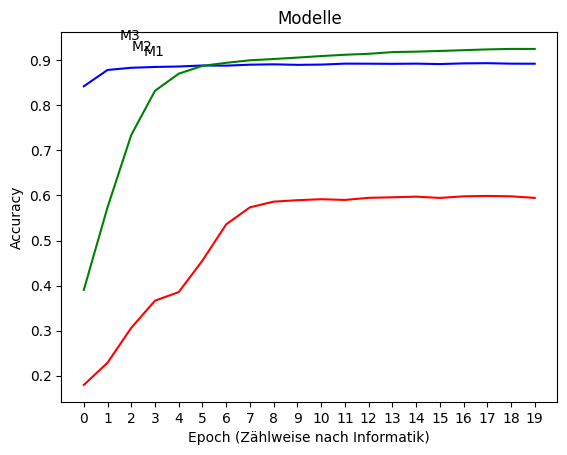

In [24]:
plt.plot(m1.history['accuracy'], 'b')
plt.plot(m2.history['accuracy'], 'r')
plt.plot(m3.history['accuracy'], 'g')
plt.title('Modelle')
plt.ylabel('Accuracy')
plt.xlabel('Epoch (Zählweise nach Informatik)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.text(2.5,0.91,'M1')
plt.text(2.0,0.922,'M2')
plt.text(1.5,0.945,'M3')
plt.show()

# **6. application example 2: classification of color images using CNN**.



In the next application example, neural networks are used to solve a much more complex problem: The classification of color images. For this purpose, the data set is loaded first:

In [1]:
from tensorflow.keras import datasets, layers, models

In [2]:
(xTrain,yTrain), (xTest,yTest) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


The Cifar10 dataset contains 60,000 color images, with $\times$ 32 pixels per image, each pixel occupied by three RGB channels that determine the color of the pixel. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. Each class is represented on 6,000 images.

In [3]:
xTrain.shape

(50000, 32, 32, 3)

In [4]:
xTest.shape

(10000, 32, 32, 3)

For illustration, training image number 100 is shown, which represents a ship:

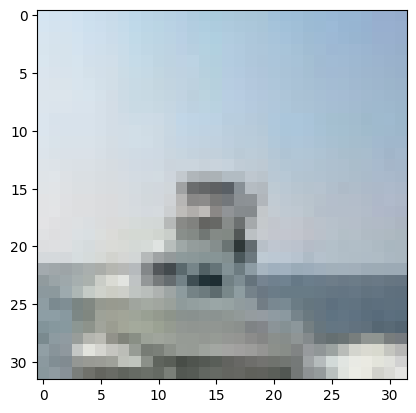

In [7]:
plt.imshow(xTrain[100])

With a smaller image size, the content of the image is more visible:

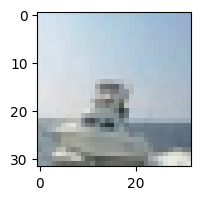

In [8]:
plt.figure(figsize=(15,2))
plt.imshow(xTrain[100])

Ten sample images per class are shown below:

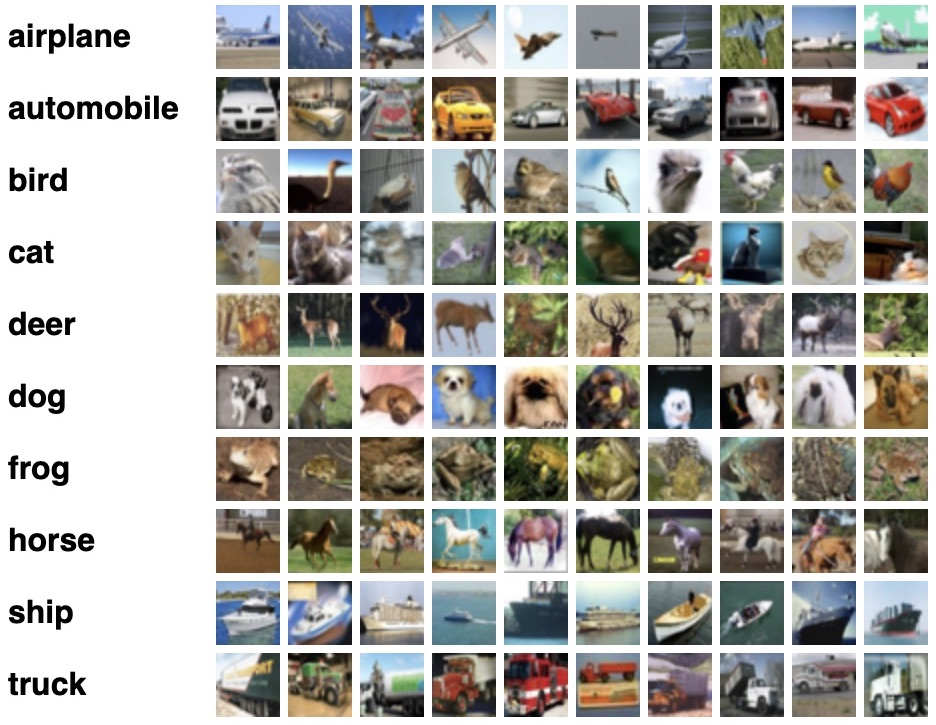

In [9]:
!wget -q https://paperswithcode.com/media/datasets/CIFAR-10-0000000431-b71f61c0_U5n3Glr.jpg
Image(filename='CIFAR-10-0000000431-b71f61c0_U5n3Glr.jpg')

This is followed by numerical recoding of the class names:

In [10]:
cifarClasses=["airplane=0","automobile=1","bird=2","cat=3","deer=4","dog=5","frog=6","horse=7","ship=8","truck=9"]
yTrain = yTrain.reshape(-1,)
def sample(xTrain, yTrain, number):
    plt.figure(figsize = (15,2))
    plt.imshow(xTrain[number])
    plt.xlabel(cifarClasses[yTrain[number]])

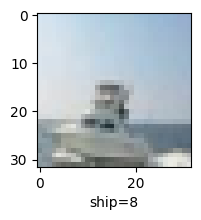

In [11]:
sample(xTrain,yTrain,100)

## 6.1 Application of Model 3 to cifar10

First, we attempt to solve the classification problem using Model 3 from the last application example:

In [12]:
xTrain = tf.keras.utils.normalize(xTrain, axis=1)
xTest = tf.keras.utils.normalize(xTest, axis=1)

In [13]:
model4 = models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                         layers.Dense(15, activation='relu'),
                         layers.Dense(20, activation='relu'),
                         layers.Dense(10, activation='sigmoid')])

model4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

M4 = model4.fit(xTrain,yTrain, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 10s 3ms/step - loss: 2.1938 - accuracy: 0.1590
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.1382 - accuracy: 0.1738
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1245 - accuracy: 0.1768
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.1191 - accuracy: 0.1783
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1151 - accuracy: 0.1786
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.1143 - accuracy: 0.1799
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1098 - accuracy: 0.1793
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1095 - accuracy: 0.1796
Epoch 9/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.1072 - accuracy: 0.1810
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.10

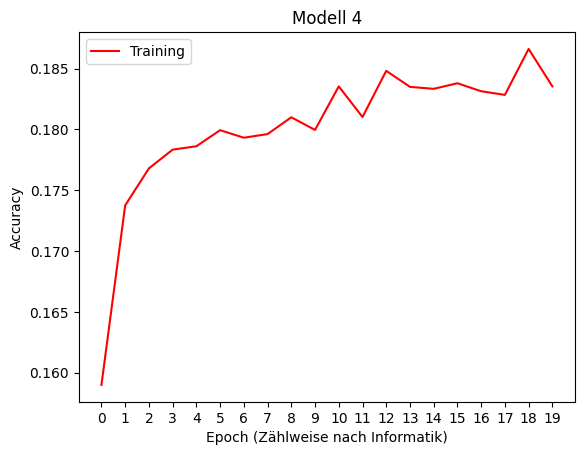

In [14]:
plt.plot(M4.history['accuracy'],'r')
plt.title('Modell 4')
plt.ylabel('Accuracy')
plt.xlabel('Epoch (Zählweise nach Informatik)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.legend(['Training'], loc='upper left')
plt.show()

In [15]:
model4.evaluate(xTest,yTest)

313/313 [==============================] - 2s 5ms/step - loss: 2.1230 - accuracy: 0.1772


[2.1229794025421143, 0.17720000445842743]

As can be seen here from the accuracy and the progression of the accuracy over the epochs, the model can only solve the task inadequately. Among other things, this is due to the significantly larger input quantity that the model has to cope with.

## 6.2 Use of a Convolutional Neural Network

Since feedforward networks, at least in this configuration, are not suitable to solve the existing problem satisfactorily, it is tried out whether another kind of neural networks achieves a better performance: The so-called Convolutional Neural Networks (CNN). The main extension of these networks is that, before processing the data over already known layers, they use convolution and pooling layers to search the images for the existence of spatial patterns and then combine them. For this purpose, the convolution layer searches the image over so-called local receptive fields, which pass on a high value if the searched pattern occurs at a location.

The following graphic shows a local receptive field, which forwards its output only to a certain neuron, depending on its own position:

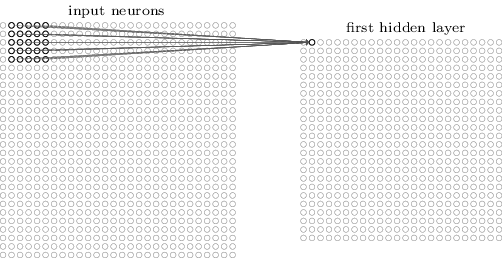

In [16]:
!wget -q http://neuralnetworksanddeeplearning.com/images/tikz45.png
Image(filename='tikz45.png',width=600)

In this way, the information is also passed on at which position within the image the pattern occurs. After several fields have been used to determine various regularities and their position, this information is further condensed in the pooling layers before being passed on to other layers. The major advantage of CNNs is that they can make better use of spatial information, so they have wide applications in object recognition.

The following diagram shows the entire process. First, the local receptive fields are used to search for patterns, here for example eye or nose, before these are linked in the pooling step to form larger connected systems, for example the head. These newly added steps are collectively referred to as "feature extraction". The data is then forwarded to the part of the network that performs the central information processing steps related to classification:

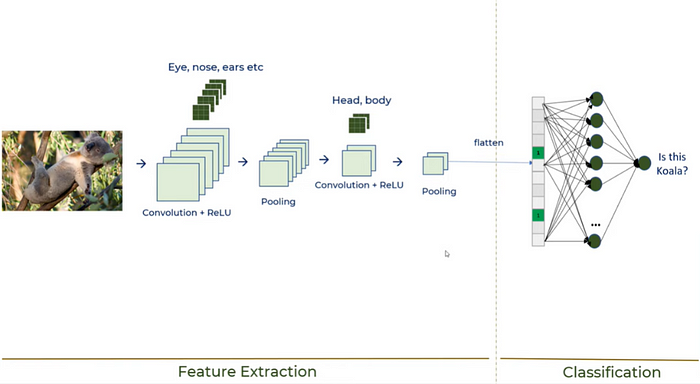

In [17]:
!wget -q https://miro.medium.com/max/700/1*BdM4i5fYqfUbukyjRwFQ9Q.png
Image(filename='1*BdM4i5fYqfUbukyjRwFQ9Q.png')

It is specified that 64 filters are applied, each of them searching over a field of size 3 $\times$ 3.
In addition, max-pooling is used, i.e. only the largest match of a field with the searched pattern within a fixed environment is forwarded. Softmax was used as the activation function of the output layer, which has the property that the sum of all outputs of this layer always equals one. This is a common choice for image recognition using CNN.

In [18]:
modelCNN = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
modelCNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
M5 = modelCNN.fit(xTrain,yTrain, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 15s 5ms/step - loss: 1.6623 - accuracy: 0.4072
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2875 - accuracy: 0.5495
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1424 - accuracy: 0.6049
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0508 - accuracy: 0.6370
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9877 - accuracy: 0.6599
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9205 - accuracy: 0.6804
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8691 - accuracy: 0.7011
Epoch 8/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8246 - accuracy: 0.7148
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7820 - accuracy: 0.7306
Epoch 10/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.74

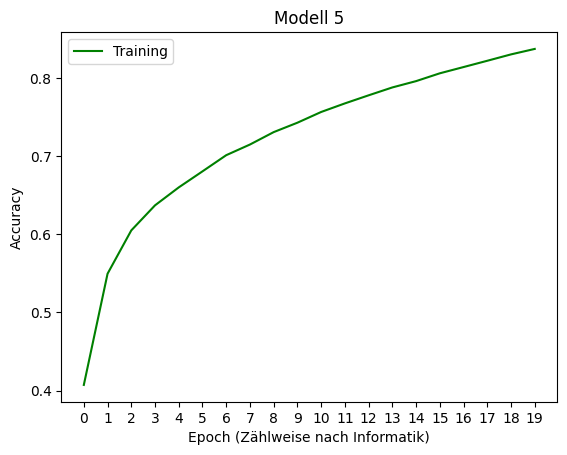

In [19]:
plt.plot(M5.history['accuracy'],'g')
plt.title('Modell 5')
plt.ylabel('Accuracy')
plt.xlabel('Epoch (Zählweise nach Informatik)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.legend(['Training'], loc='upper left')
plt.show()

Even though the CNN still shows a certain problem with regard to overfitting, it can also achieve a significantly better performance than the comparison network via the test data:

In [20]:
modelCNN.evaluate(xTest,yTest)

313/313 [==============================] - 1s 4ms/step - loss: 1.1161 - accuracy: 0.6801


[1.1160888671875, 0.6801000237464905]

# **7. Ausblick Explainable AI**

Wie bereits in der theoretischen Einführung deutlich wurde und nochmal im Anwendungsbeispiel veranschaulicht, gelangt das Neurale Netz über eine Vielzahl von Parameter zu seinem Ergebnis. Aus diesem Grund ist es bei immer tieferen und komplexeren Netzwerken zunehmend schwierig die Entscheidungsfindung bzw. Informationsverarbeitung des Neuralen Netzes nachzuvollziehen:
1. Warum kam es zu jener Einschätzung?
2. Welche Teilmenge oder Interaktion von verfügbaren Informationen waren verantwortlich dafür, dass diese Klassifikation geschah?

Dass solche Fragen Relevanz besitzen verdeutlicht das folgende Beispiel:

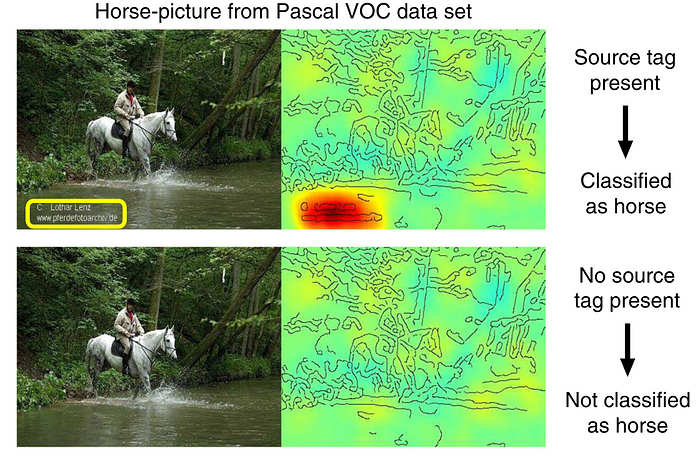

In [21]:
!wget -q https://miro.medium.com/max/700/1*L4xlI0ueNYVZLiekeP8Gbw.png
Image(filename='1*L4xlI0ueNYVZLiekeP8Gbw.png',width=600)

As can be seen here on the basis of the heat map, the lower left area of the image was primarily responsible for the correct classification of the image. The actual contour of the horse seems to have had little relevance for this classification. Obviously, overfitting to the training data has taken place, since the neural network seems to have successfully learned to classify all images with just this watermark as horse with rider. What makes this fact even more serious is that this overfitting would probably not have been noticed if the test images were from the same data set as the training images, i.e. if they also had the correspondingly placed watermark. However, this could have fatal consequences in practice if this network were to be used for autonomous driving tasks, for example, as it would not be able to correctly recognize riders since they are not associated with watermarks outside of the training dataset. This raises the fundamental question of safety: how to ensure and verify that the model learned what it was supposed to learn and is not simply exploiting some feature of the dataset to classify correctly, but has no perception of the features it is actually looking for. For these reasons, there are increasing efforts to make the decision making of these networks understandable to humans and thus controllable. This is summarized under the buzzword of Explainable AI.

# **8. Literatur**


James, Gareth, Daniela Witten, Trevor Hastie und Robert Tibshirani (2013). *An introduction to statistical learning*. Bd. 112. Springer.

Nielsen, Michael (2015). *Neural networks and deep learning*. Bd. 25. Determination press.

Richter, Stefan (2019). *Statistisches und maschinelles Lernen*. Bd. 10. Springer, S. 978–3.